<a href="https://colab.research.google.com/github/sakshik2004/FMML/blob/main/Convolutional_Neural_Networks_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

## Loading Dataset

In [5]:
# read train
train = pd.read_csv("../input/digit-recognizer/train.csv")

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.shape

(42000, 785)

In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# read test
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [10]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import pandas as pd # Import pandas to work with DataFrames

# Assuming your training data is in a CSV file named 'train.csv'
train = pd.read_csv("../input/digit-recognizer/train.csv") # Load the training data, update the file path to the correct location

# Now you can proceed with the rest of your code
Y_train = train["label"] # put label into y_train variable
X_train = train.drop(labels = ["label"],axis =1) # Drop label column

In [2]:
import pandas as pd # Import pandas to work with DataFrames

# Assuming your training data is in a CSV file named 'train.csv'
train = pd.read_csv("../input/digit-recognizer/train.csv") # Load the training data, update the file path to the correct location

# Now you can proceed with the rest of your code
Y_train = train["label"] # put label into y_train variable
X_train = train.drop(labels = ["label"],axis =1) # Drop label column

In [3]:
x_train = X_train.values.reshape(-1,28,28,1)

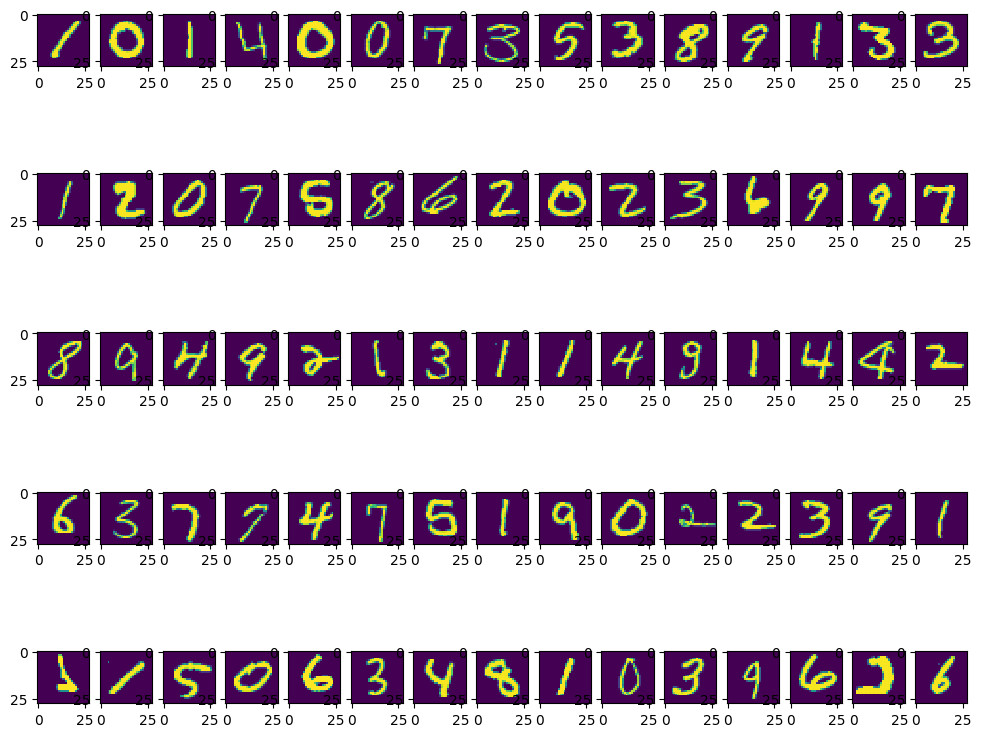

In [6]:
plt.figure(figsize=(12,10))
x, y = 15, 5
for i in range(75):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i],interpolation='nearest')
plt.show()

In [5]:
import pandas as pd

# Assuming your training data is in a CSV file named 'train.csv'
train = pd.read_csv("../input/digit-recognizer/train.csv") # Load the training data, update the file path to the correct location
# Assuming your test data is in a CSV file named 'test.csv'
test = pd.read_csv("../input/digit-recognizer/test.csv") # Load the test data, update the file path to the correct location

# Now you can proceed with the rest of your code
Y_train = train["label"] # put label into y_train variable
X_train = train.drop(labels = ["label"],axis =1) # Drop label column

x_train = X_train.values.reshape(-1,28,28,1)

# Normalize the data
X_train = X_train / 255.0
test = test / 255.0 # Now 'test' is defined and can be normalized
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [7]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [9]:
!pip install keras # Install the Keras library
from tensorflow.keras.utils import to_categorical # Import to_categorical from the correct location

# Label Encoding
Y_train = to_categorical(Y_train, num_classes = 10) # convert to one-hot-encoding

In [10]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [12]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical # Use tensorflow.keras for to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [13]:
model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [14]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [15]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [17]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

## Fit the Model

In [19]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10


<ipython-input-19-b88069656369>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


151/151 [==============================] - 47s 312ms/step - loss: 1.2914 - accuracy: 0.5605 - val_loss: 0.2938 - val_accuracy: 0.9245
Epoch 2/10
151/151 [==============================] - 30s 197ms/step - loss: 1.2712 - accuracy: 0.5733 - val_loss: 0.2635 - val_accuracy: 0.9257
Epoch 3/10
151/151 [==============================] - 30s 196ms/step - loss: 1.2547 - accuracy: 0.5694 - val_loss: 0.2581 - val_accuracy: 0.9343
Epoch 4/10
151/151 [==============================] - 34s 223ms/step - loss: 1.2304 - accuracy: 0.5817 - val_loss: 0.2480 - val_accuracy: 0.9352
Epoch 5/10
151/151 [==============================] - 30s 196ms/step - loss: 1.2211 - accuracy: 0.5853 - val_loss: 0.2268 - val_accuracy: 0.9390
Epoch 6/10
151/151 [==============================] - 31s 204ms/step - loss: 1.2077 - accuracy: 0.5902 - val_loss: 0.2763 - val_accuracy: 0.9219
Epoch 7/10
151/151 [==============================] - 30s 197ms/step - loss: 1.1938 - accuracy: 0.5972 - val_loss: 0.2240 - val_accuracy: 0.9

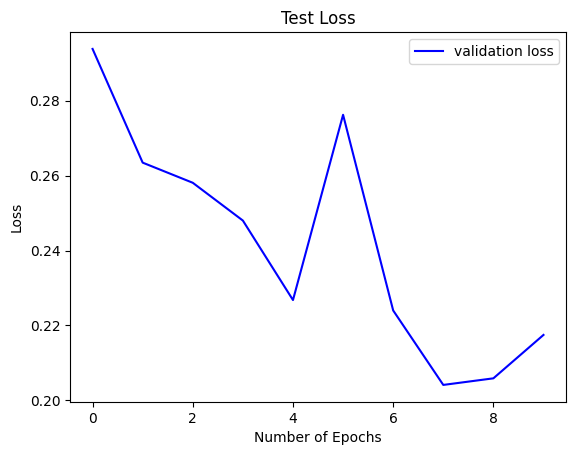

In [20]:
# plot the loss accuracy curves for training and validation
plt.plot(history.history["val_loss"], color = "b", label= "validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 2s 14ms/step


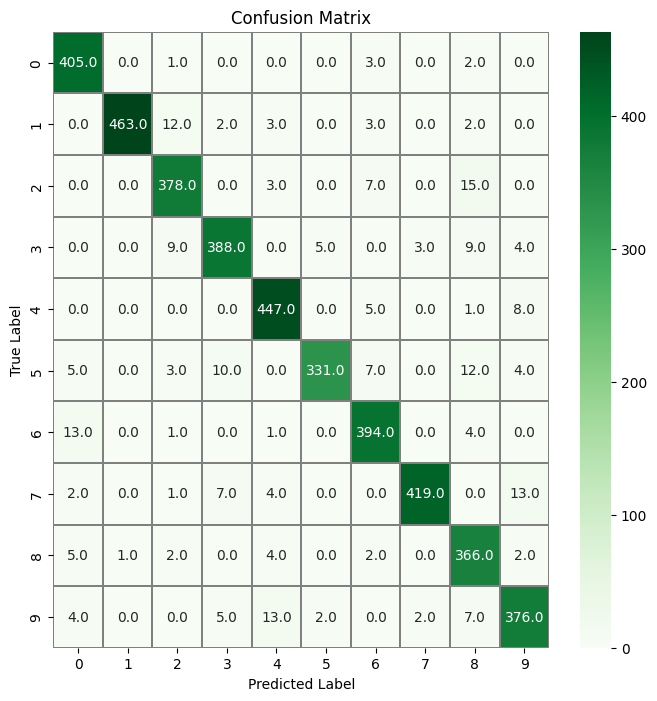

In [22]:
# confusion matrix
import seaborn as sns
import numpy as np # Import numpy

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Implement Pytorch

In [23]:
preds = model.predict(test)
preds = np.argmax(preds,axis = 1)

output = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
output['Label'] = preds
output.to_csv('/kaggle/working/submission.csv',index=False)

875/875 [==============================] - 7s 8ms/step


In [24]:
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
